In [11]:
using Revise

In [12]:
using FourierOptics
using Images

In [13]:
using CairoMakie
import CairoMakie: Axis
set_theme!(theme_black())

In [35]:
methods(aperture)

# 3 methods for generic function "aperture":
[1] aperture(Nx::Integer, Ny::Integer; img_path, img_size, T) in FourierOptics at c:\Users\lihua\Desktop\Project W\src\apertures.jl:92
[2] aperture(Nx::Integer, Ny::Integer, w; shape, origin, rim, T) in FourierOptics at c:\Users\lihua\Desktop\Project W\src\apertures.jl:19
[3] aperture(N::Integer, w::Real; origin, rim, T) in FourierOptics at c:\Users\lihua\Desktop\Project W\src\apertures.jl:64

In [47]:
@doc aperture

```
aperture(Nx::Integer, Ny::Integer, w; shape=:circ, origin=middle.((Nx, Ny)), rim=3, T=Float32)
```

Return a `Nx` $\times$ `Ny` mask matrix of eltype `T` represents the aperture.

# Arguments

  * `Nx`: length along x direction
  * `Ny`: length along y direction
  * `w`: half width of each side or (radius, number of side) for regular polygon
  * `shape`: shape of the aperture. `:circ`, `:rect` and `:regular_polygon`
  * `origin`: origin of aperture
  * `rim`: edge width
  * `T`: data type of mask matrix

```
aperture(Nx::Integer, Ny::Integer; img_path::String, img_size::NTuple{Integer, 2}, T=Float32)
```

Return a `Nx` $\times$ `Ny` mask matrix of eltype `T` represents the aperture.

# Arguments

  * `Nx`: length along x direction
  * `Ny`: length along y direction
  * `img_path`: path of img file
  * `img_size`:
  * `T`: data type of mask matrix


In [14]:
Nx = 1024
Ny = 1024
w = 300

300

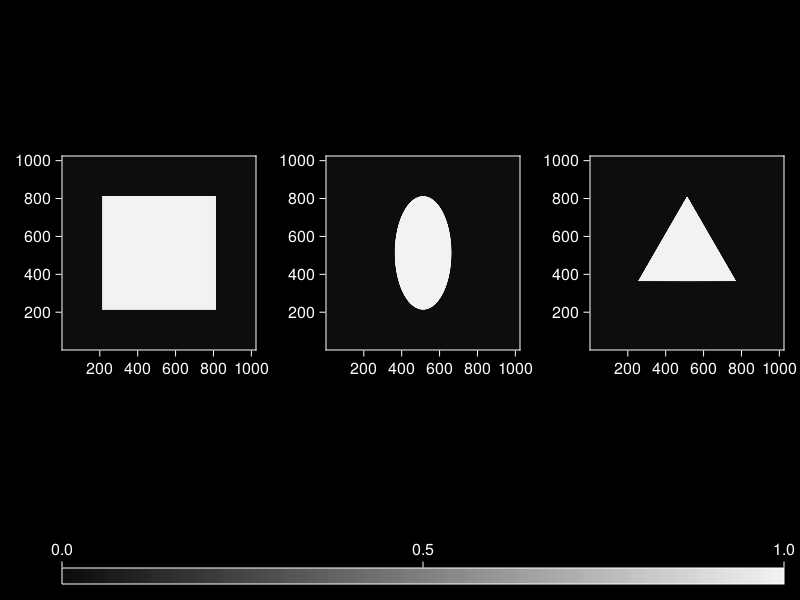

In [37]:
ap_rect = aperture(Nx, Ny, w, shape=:rect)
ap_circ = aperture(Nx, Ny, (w / 2, w), shape=:circ)
ap_poly = aperture(Nx, Ny, (w, 3), shape=:regular_polygon)
ap = [ap_rect, ap_circ, ap_poly]
let
    fig = Figure()
    ax = [Axis(fig[1, i], aspect=DataAspect()) for i in 1:length(ap)]
    for i in 1:length(ap)
        heatmap!(ax[i], ap[i], colormap=:grays)
    end
    Colorbar(fig[2, :], vertical=false, colormap=:grays, tellheight=true)
    fig
end

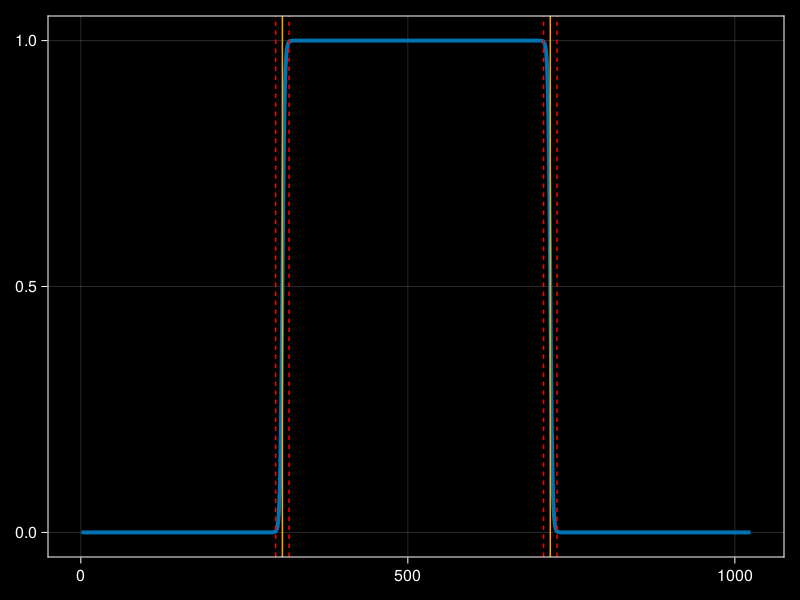

In [43]:
let N = Nx
    w = N / 5
    rim = w / 20
    ap = aperture(N, w; rim=rim)
    fig, ax = lines(ap, linewidth=4)
    vlines!([-w, w] .+ Nx ÷ 2 .+ 1, color=:orange)
    vlines!([-w - rim, w + rim, -w + rim, w - rim] .+ Nx ÷ 2 .+ 1, color=:red, linestyle=:dash)
    fig
end

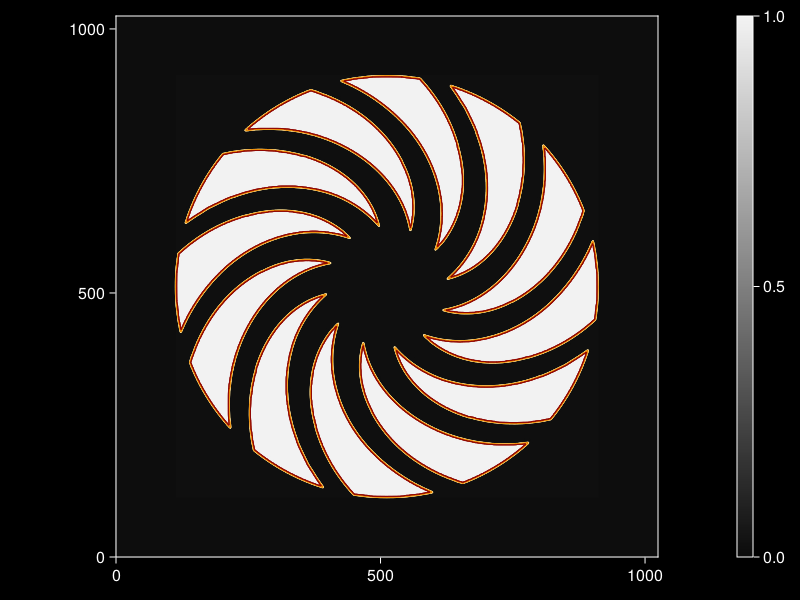

In [17]:
img_path = "../images/spiral.png"
img_size = (800, 800)
ap_img = aperture(Nx, Ny; img_path=img_path, img_size=img_size)
let ap = ap_img
    fig = Figure()
    ax = Axis(fig[1, 1], aspect=DataAspect())
    heatmap!(ax, ap, colormap=:grays)
    contour!(ax, ap, levels = 50/255:100/255:1, colormap=:heat)
    Colorbar(fig[1, 2], vertical=true, colormap=:grays, tellheight=true)
    fig
end

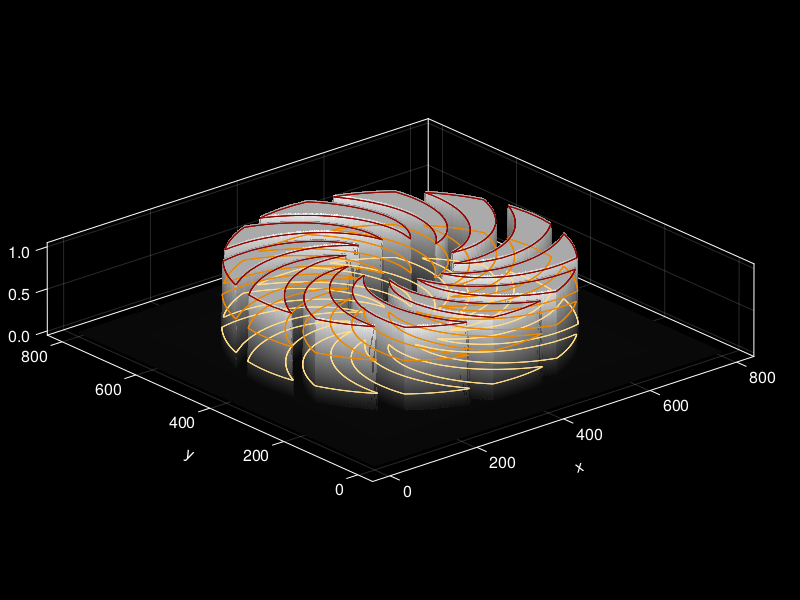

In [18]:
let ap = imresize(ap_img, ceil.(Int, size(ap_img) .* (800 ./ size(ap_img)[1])))
    surface(ap, axis = (type = Axis3, aspect = (Nx, Ny, Nx/5)), colormap=:grays)
    contour3d!(ap, levels = 50/255:100/255:1, colormap=:heat)
    current_figure()
end